In [14]:
import warnings
warnings.filterwarnings("ignore")

## Image Pre-processing

### Importing the necessary libraries

In [80]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import build_montages
from imutils import paths
import os
import pickle

### Functions to load and quantify the images 

In [81]:
def quantify_image(image):
    features = feature.hog(image, 
                           orientations=9, 
                           pixels_per_cell=(5,5), 
                           cells_per_block=(2,2), 
                           transform_sqrt=True, 
                           block_norm="L1")
    return features

In [82]:
def load_split(path):
    path_images = list(paths.list_images(path))
    data=[]
    labels=[]

    for path_image in path_images:
        label = path_image.split(os.path.sep)[-2]
        image = cv2.imread(path_image)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200,200))
        image = cv2.threshold(image,0,225,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

        features = quantify_image(image)
        data.append(features)
        labels.append(label)

    return (np.array(data), np.array(labels))


#### Using spiral images

### Defining the path for training data and testing data

In [95]:
path_training_data = r"dataset/spiral/training"
path_testing_data = r"dataset/spiral/testing"

### Loading the training and testing data

In [96]:
(x_train, y_train) = load_split(path_training_data)
(x_test, y_test) = load_split(path_testing_data)

### Label Encoding

In [97]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print(x_train.shape, y_train.shape)
# 0:healthy,1:Parkinson

(72, 54756) (72,)


## Building the model

### Training the model

In [98]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Testing the model

In [99]:
testingPaths = list(paths.list_images(path_testing_data))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False) 
images = []

In [100]:
for i in idxs:
    # loading the testing image, clone it, and resize it 
    image = cv2.imread(testingPaths[i]) 
    output = image. copy() 
    output = cv2. resize(output, (128, 128))
    
    # pre-processing the image 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
    
    # quantify the image and make predictions based on the extracted 
    # features using the last trained Random Forest 
    features = quantify_image(image) 
    preds = model.predict([features])

    label = label_encoder.inverse_transform(preds)[0]

    # draw the colored class label on the output image and add it to the set of output images 
    if label == "healthy":
        color = (0, 255, 0)  
    else:
        color = (0, 0, 255) 
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2) 
    images.append(output)

### Evaluating the model

In [101]:
predictions = model.predict(x_test)    # predictions on the testing data 

cm = confusion_matrix(y_test, predictions).flatten ()    # computing the confusion matrix
print(cm) 
(tn, fp, fn, tp) = cm 

accuracy = (tp + tn) / float(cm.sum())     # computing the accuracy
print(accuracy)

[14  1  6  9]
0.7666666666666667


### Saving the model

In [102]:
pickle.dump(model,open('parkinson.pkl', 'wb'))

# 

#### Using wave images

### Defining the path for wave training data and testing data

In [103]:
path_training_data = r"dataset/wave/training"
path_testing_data = r"dataset/wave/testing"

### Loading the training and testing data

In [104]:
(x_train, y_train) = load_split(path_training_data)
(x_test, y_test) = load_split(path_testing_data)

### Label Encoding

In [105]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print(x_train.shape, y_train.shape)
# 0:healthy,1:Parkinson

(72, 54756) (72,)


## Building the model

### Training the model

In [106]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Testing the model

In [107]:
testingPaths = list(paths.list_images(path_testing_data))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False) 
images = []

In [108]:
for i in idxs:
    # loading the testing image, clone it, and resize it 
    image = cv2.imread(testingPaths[i]) 
    output = image. copy() 
    output = cv2. resize(output, (128, 128))
    
    # pre-processing the image 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
    
    # quantify the image and make predictions based on the extracted 
    # features using the last trained Random Forest 
    features = quantify_image(image) 
    preds = model.predict([features])

    label = label_encoder.inverse_transform(preds)[0]

    # draw the colored class label on the output image and add it to the set of output images 
    if label == "healthy":
        color = (0, 255, 0)  
    else:
        color = (0, 0, 255) 
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2) 
    images.append(output)

### Evaluating the model

In [109]:
predictions = model.predict(x_test)    # predictions on the testing data 

cm = confusion_matrix(y_test, predictions).flatten ()    # computing the confusion matrix
print(cm) 
(tn, fp, fn, tp) = cm 

accuracy = (tp + tn) / float(cm.sum())     # computing the accuracy
print(accuracy)

[11  4  7  8]
0.6333333333333333


### Saving the model

In [110]:
pickle.dump(model,open('parkinson_w.pkl', 'wb'))

# 

## 

# CNN Classifier

### Importing the necessary libraries

In [32]:
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob

### Defining the path for training data and testing data

In [34]:
train_path = 'dataset/spiral/training'
test_path = 'dataset/spiral/testing'

### Displaying the images

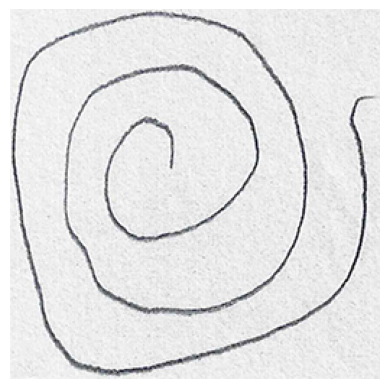

(256, 256, 3)


In [36]:
img = load_img(train_path + "/healthy/(1).png")
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

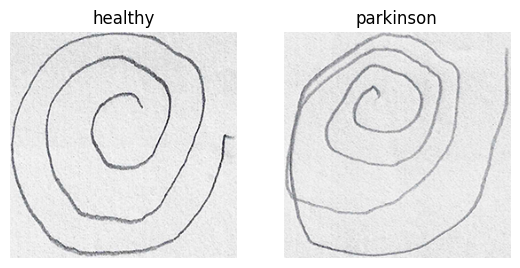

In [37]:
#Visualizing more Images
images = ['healthy', 'parkinson']
fig = plt.figure(figsize =(10,10))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + '/'+ images[i] +"/(2).png"))

### Finding number of classes

In [38]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

2


### Defining the layers of CNN

In [39]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)      

### Training the model

In [40]:
epochs = 30
batch_size = 64

In [41]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                shear_range = 0.3,
                horizontal_flip=True,
                zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
                directory = train_path,
                target_size= x.shape[:2],
                batch_size = batch_size,
                color_mode= "rgb",
                class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
                directory = test_path,
                target_size= x.shape[:2],
                batch_size = batch_size,
                color_mode= "rgb",
                class_mode= "categorical")

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [42]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)


Epoch 1/30
25/25 [==============================] - 138s 6s/step - loss: 4.4844 - accuracy: 0.4957 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 2/30
25/25 [==============================] - 87s 3s/step - loss: 0.7659 - accuracy: 0.4782 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 3/30
25/25 [==============================] - 90s 4s/step - loss: 0.6892 - accuracy: 0.5302 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 4/30
25/25 [==============================] - 83s 3s/step - loss: 0.7938 - accuracy: 0.5321 - val_loss: 1.2249 - val_accuracy: 0.5000
Epoch 5/30
25/25 [==============================] - 270s 11s/step - loss: 0.7265 - accuracy: 0.5573 - val_loss: 0.8094 - val_accuracy: 0.5000
Epoch 6/30
25/25 [==============================] - 90s 4s/step - loss: 0.6882 - accuracy: 0.5851 - val_loss: 0.6929 - val_accuracy: 0.5333
Epoch 7/30
25/25 [==============================] - 110s 4s/step - loss: 0.6850 - accuracy: 0.5841 - val_loss: 0.7621 - val_accuracy: 0.5667
Epoch 8/30
25/2

### Plotting the training and validation losses

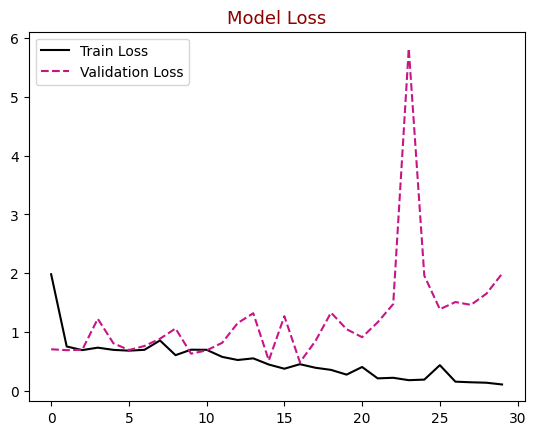

In [43]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

### Testing the model

In [49]:
#Printing class dictionary
print(test_generator.class_indices)

{'healthy': 0, 'parkinson': 1}


In [53]:
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

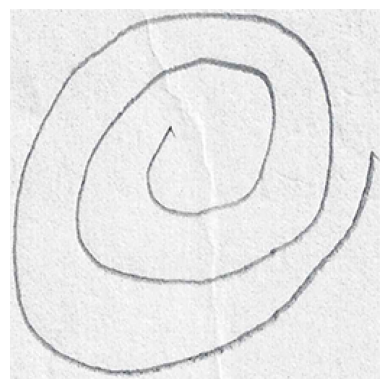

In [57]:
img = load_img(test_path + "/healthy/(3).png")
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
image = load(test_path + "/healthy/(3).png")

In [58]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[0]


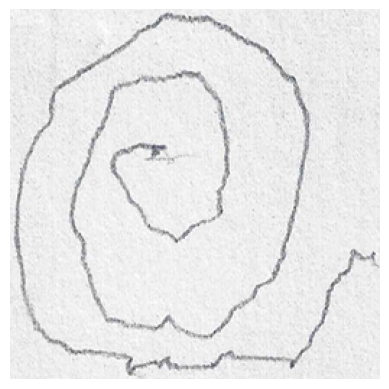

In [62]:
img1 = load_img(test_path + "/parkinson/(5).png")
plt.imshow(img1)
plt.axis("off")
plt.show()
#Loading the image 
image1 = load(test_path + "/parkinson/(5).png")

In [63]:
prediction = (np.argmax(model.predict(image1), axis=-1))
print(prediction)

[1]


### Saving the CNN model

In [51]:
# model.save('cnn_parkinsons.model')

In [52]:
pickle.dump(model, open('cnn_parkinson.pkl', 'wb'))